### Initial Dataset Exploration

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Examining dataset
weather_df = pd.read_csv("seattle-weather.csv")
weather_df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [2]:
#Checking for null values
null_values = weather_df.isnull().sum()
print(f"Null Values :\n{null_values} ")

Null Values :
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64 


In [3]:
#Checking dimensions
print(weather_df.shape)

(1461, 6)


In [4]:
#Checking data types
print(weather_df.dtypes)

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [5]:
#All data barring date and weather are numeric. For weather, we will categorize to make it numeric. For date, we will extract
#date, month, and year, and have them as numeric values in respective columns.

#Checking descriptive statistics
print(weather_df.describe())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


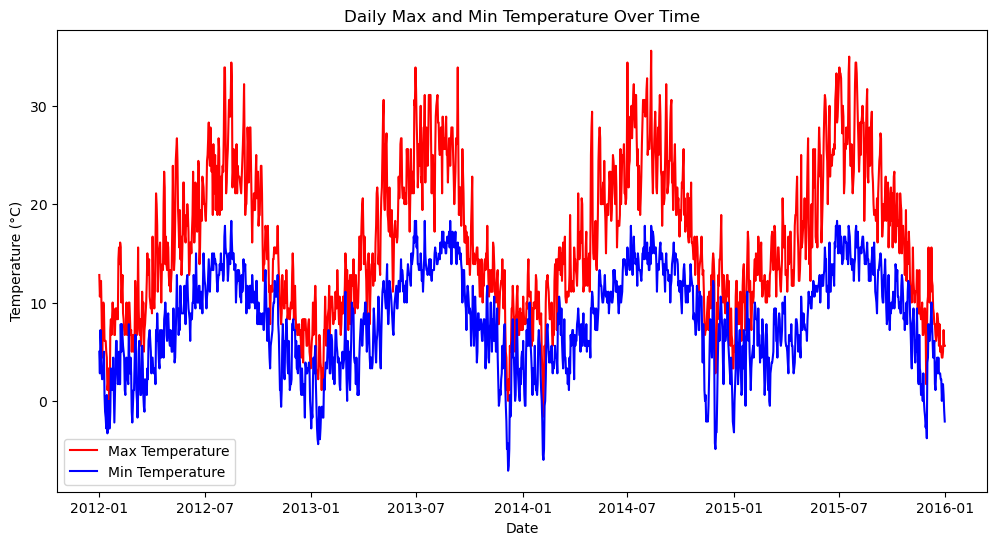

In [6]:

# Convert date column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Set the date as the index for time series plots
weather_df.set_index('date', inplace=True)

# Plot for Max and Min Temp over time
plt.figure(figsize=(12, 6))
plt.plot(weather_df.index, weather_df['temp_max'], label='Max Temperature', color='red')
plt.plot(weather_df.index, weather_df['temp_min'], label='Min Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Max and Min Temperature Over Time')
plt.legend()
plt.show()

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_78262/3214149700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_df['month'], y=weather_df['temp_max'], palette='coolwarm')


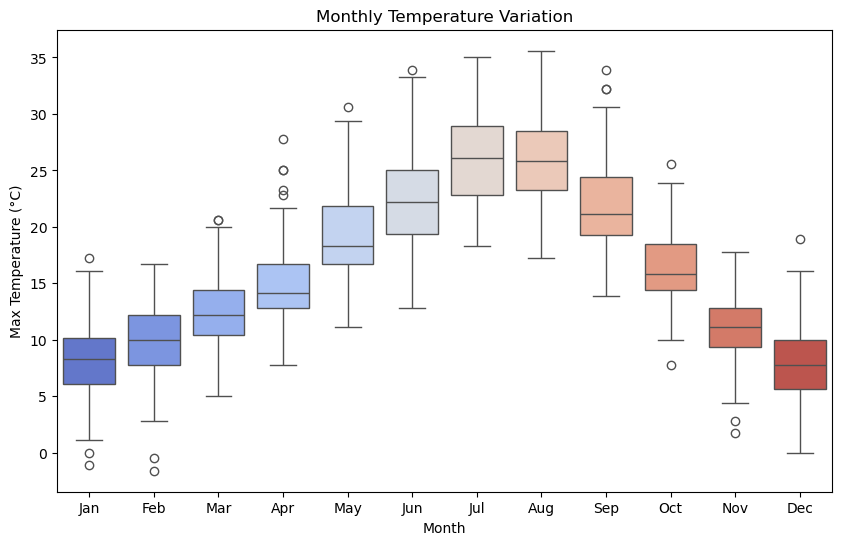

In [7]:
weather_df['month'] = weather_df.index.month
plt.figure(figsize=(10, 6))
sns.boxplot(x=weather_df['month'], y=weather_df['temp_max'], palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Max Temperature (°C)')
plt.title('Monthly Temperature Variation')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_78262/3852600336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=weather_df['weather'], order=weather_df['weather'].value_counts().index, palette='viridis')


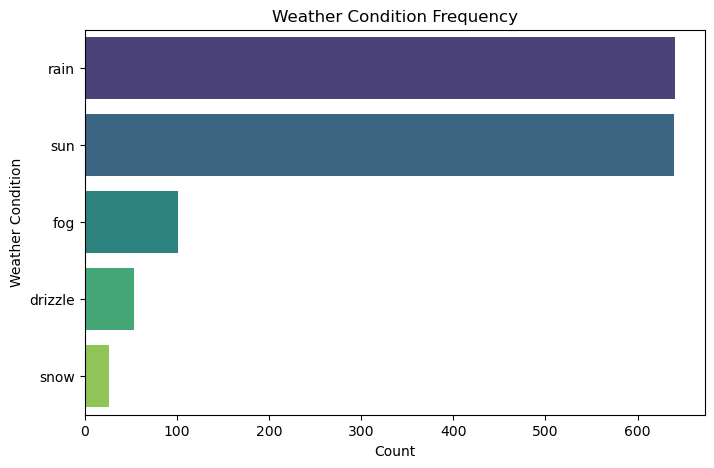

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(y=weather_df['weather'], order=weather_df['weather'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.title('Weather Condition Frequency')
plt.show()

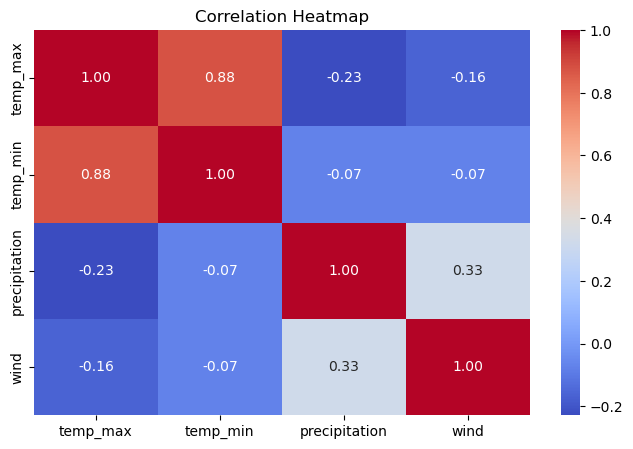

In [9]:
plt.figure(figsize=(8, 5))
sns.heatmap(weather_df[['temp_max', 'temp_min', 'precipitation', 'wind']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Machine Learning Preprocessing

In [10]:

pp_weather_df = weather_df.copy()

pp_weather_df['year'] = pp_weather_df.index.year
pp_weather_df['month'] = pp_weather_df.index.month
pp_weather_df['day'] = pp_weather_df.index.day
pp_weather_df['day_of_week'] = pp_weather_df.index.dayofweek

pp_weather_df = pd.get_dummies(pp_weather_df, columns=['weather'], prefix='weather')
weather_columns = ['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']
pp_weather_df[weather_columns] = pp_weather_df[weather_columns].astype(int)

output_file = "pp_weather.csv"
pp_weather_df.to_csv(output_file, index=False)

pp_weather_df.head()


,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "pp_weather.csv"
pp_weather_df = pd.read_csv(file_path)

X = pp_weather_df.drop(columns=['temp_max'])  # Features
y = pp_weather_df['temp_max']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Results
print("=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2393
Root Mean Squared Error (RMSE): 2.8704
R² Score: 0.8552


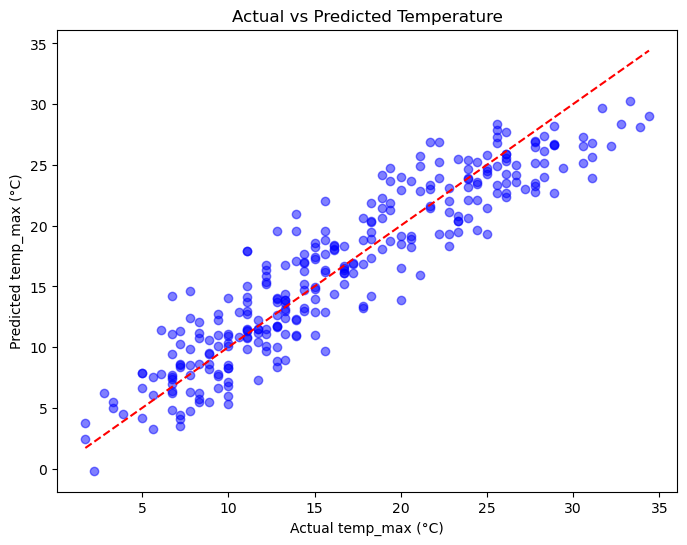

In [12]:
# Scatter Plot: Actual vs Predicted Temperature
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Ideal Fit Line
plt.xlabel("Actual temp_max (°C)")
plt.ylabel("Predicted temp_max (°C)")
plt.title("Actual vs Predicted Temperature")
plt.show()

=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2393
Root Mean Squared Error (RMSE): 2.8704
Mean Absolute Error (MAE): 2.3222
R² Score: 0.8552


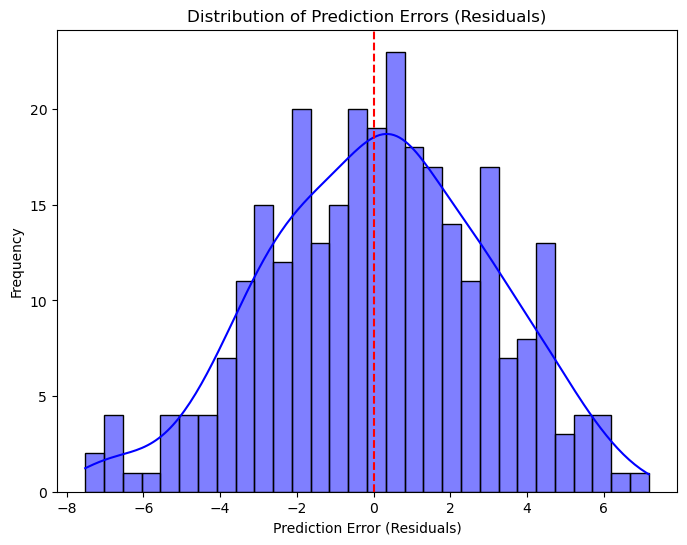

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")  # Reference line at 0 error
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.show()


### Determining Feature importance

In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression, mutual_info_regression

file_path = "pp_weather.csv"
pp_weather_df = pd.read_csv(file_path)

X = pp_weather_df.drop(columns=['temp_max'])  # Features
y = pp_weather_df['temp_max']  # Target

f_scores, _ = f_regression(X, y)
mi_scores = mutual_info_regression(X, y)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'Mutual Information': mi_scores
}).sort_values(by='F-Score', ascending=False)

print(feature_importance_df)


            Feature      F-Score  Mutual Information
1          temp_min  4798.160272            0.831821
11      weather_sun   297.096492            0.098707
9      weather_rain   216.053702            0.134499
0     precipitation    80.414883            0.121460
10     weather_snow    60.204482            0.052317
2              wind    40.760044            0.048664
3             month    35.535733            0.670281
4              year    18.701868            0.027157
5               day     2.382406            0.000000
7   weather_drizzle     0.267443            0.005579
8       weather_fog     0.203442            0.023287
6       day_of_week     0.016577            0.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

selected_features = ['temp_min', 'weather_sun', 'weather_rain', 'precipitation', 'weather_snow', 'wind', 'month']
X_selected = pp_weather_df[selected_features]
y = pp_weather_df['temp_max']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

linreg_optimized = LinearRegression()
linreg_optimized.fit(X_train, y_train)

y_pred_optimized = linreg_optimized.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

improved_results = {
    "Mean Squared Error (MSE)": mse_optimized,
    "Root Mean Squared Error (RMSE)": rmse_optimized,
    "Mean Absolute Error (MAE)": mae_optimized,
    "R² Score": r2_optimized
}


In [17]:
print("=== Optimized Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"R² Score: {r2_optimized:.4f}")


=== Optimized Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2455
Root Mean Squared Error (RMSE): 2.8715
Mean Absolute Error (MAE): 2.3287
R² Score: 0.8551


### Neural Network

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric columns
scaler = MinMaxScaler()
numeric_cols = ["precipitation", "temp_max", "temp_min", "wind"]
pp_weather_df[numeric_cols] = scaler.fit_transform(pp_weather_df[numeric_cols])

print(pp_weather_df.head())
# Check if normalization was successful
normalized_check_after = (pp_weather_df[numeric_cols].max() <= 1).all()
normalized_check_after


   precipitation  temp_max  temp_min      wind  month  year  day  day_of_week  \
0       0.000000  0.387097  0.476378  0.472527      1  2012    1            6   
1       0.194991  0.327957  0.389764  0.450549      1  2012    2            0   
2       0.014311  0.357527  0.562992  0.208791      1  2012    3            1   
3       0.363148  0.370968  0.500000  0.472527      1  2012    4            2   
4       0.023256  0.282258  0.389764  0.626374      1  2012    5            3   

   weather_drizzle  weather_fog  weather_rain  weather_snow  weather_sun  
0                1            0             0             0            0  
1                0            0             1             0            0  
2                0            0             1             0            0  
3                0            0             1             0            0  
4                0            0             1             0            0  


True

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner as kt

# Prepare dataset for training
X = pp_weather_df.drop(columns=["temp_max"])  # Features
y = pp_weather_df["temp_max"]  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2025-03-03 13:32:51.402844: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    activation = hp.Choice('activation', ['relu', 'tanh'])

    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=16, max_value=128, step=16),
        activation=activation,
        input_shape=(X_train.shape[1],)  # Adjusted to match feature count dynamically
    ))

    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=activation
        ))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

    nn_model.compile(loss="mse", optimizer='adam', metrics=["mae"])

    return nn_model

tuner = kt.Hyperband(
    create_model,
    objective='val_mae',  # Mean Absolute Error for regression
    max_epochs=100,
    factor=3,
    directory='kt_tuning',
    project_name='temp_max_prediction'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)



Trial 254 Complete [00h 00m 24s]
val_mae: 0.17033889889717102

Best val_mae So Far: 0.11708018183708191
Total elapsed time: 00h 23m 44s


In [28]:
tuner.results_summary()


Results summary
Results in kt_tuning/temp_max_prediction
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 0245 summary
Hyperparameters:
activation: relu
first_units: 112
num_layers: 1
units_0: 48
units_1: 128
units_2: 112
units_3: 80
units_4: 16
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0243
Score: 0.11708018183708191

Trial 0251 summary
Hyperparameters:
activation: relu
first_units: 96
num_layers: 2
units_0: 32
units_1: 80
units_2: 96
units_3: 112
units_4: 16
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.13517042994499207

Trial 0246 summary
Hyperparameters:
activation: relu
first_units: 32
num_layers: 2
units_0: 64
units_1: 64
units_2: 96
units_3: 16
units_4: 16
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0239
Score: 0.14505358040332794

Trial 0243 summary
Hyperparameters:
activation: relu
first_units: 112
num_layers: 1
units_0: 48


In [30]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9126.4004 - mae: 75.4850 - val_loss: 350.7493 - val_mae: 18.7261
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.7918 - mae: 8.9266 - val_loss: 1.0878 - val_mae: 1.0060
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7243 - mae: 1.4198 - val_loss: 0.1379 - val_mae: 0.2881
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1438 - mae: 0.2986 - val_loss: 0.0903 - val_mae: 0.2518
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0739 - mae: 0.2137 - val_loss: 0.0726 - val_mae: 0.2127
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0671 - mae: 0.2008 - val_loss: 0.0728 - val_mae: 0.2105
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0709 - mae: 0.2091 - val_loss: 0.0703 - val_mae: 0.2081
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0671 - mae: 0.2031 - val_loss: 0.0683 - val_mae: 0.2069
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 -

In [31]:
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.3f}")


Test MAE: 0.118


In [40]:
predictions = best_model.predict(X_test)

temp_max_min = weather_df["temp_max"].min()
temp_max_max = weather_df["temp_max"].max()

predictions_real = predictions * (temp_max_max - temp_max_min) + temp_max_min
y_test_real = y_test * (temp_max_max - temp_max_min) + temp_max_min  # True values also denormalized

y_test_real = np.array(y_test_real)  # Convert Series to NumPy array
predictions_real = np.array(predictions_real)  # Convert to NumPy array

comparison_df = pd.DataFrame({
    "Actual Temp Max": y_test_real.flatten(),
    "Predicted Temp Max": predictions_real.flatten()
})

print(comparison_df.head(10)) 


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
   Actual Temp Max  Predicted Temp Max
0             23.9           18.823368
1              7.8            9.438650
2              9.4           10.278454
3             26.7           18.829470
4             13.3           13.205139
5             21.7           13.881183
6             28.3           15.306635
7             15.0           15.128826
8             13.9           12.955383
9             25.0           18.538561


In [41]:
print(temp_max_min)
print(temp_max_max)

-1.6
35.6


In [52]:
denormalized_mae = test_mae*(temp_max_max - temp_max_min)
print(f"Test MAE in Celsius: {denormalized_mae:.3f}")

Test MAE in Celsius: 4.374


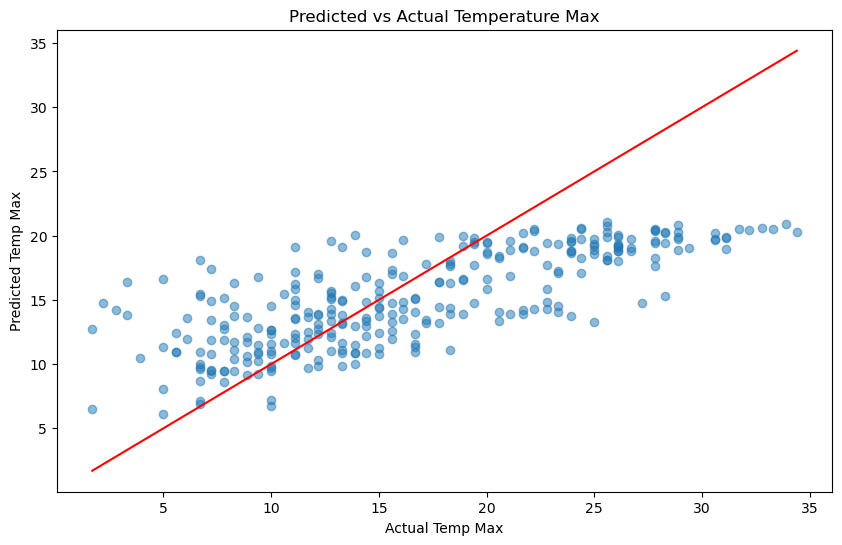

In [42]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, predictions_real, alpha=0.5)
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], color='red')  # Ideal line
plt.xlabel("Actual Temp Max")
plt.ylabel("Predicted Temp Max")
plt.title("Predicted vs Actual Temperature Max")
plt.show()


In [43]:
best_model.save("best_temp_max_model.h5")
